,chain_id,hotel_id
path,,
85/8000d59f6a3d765f.jpg,85,24607
6/8000febe81817f7f.jpg,6,25389
3/80053befc2d42fba.jpg,3,672
5/8007fa0a8fe89f9d.jpg,5,63866
0/800a4a6b6f6d2df6.jpg,0,12036
...,...,...
83/ffff8082ec219892.jpg,83,20544
82/ffff8200e50cc0f1.jpg,82,51053
83/ffff84129981a4a4.jpg,83,42842


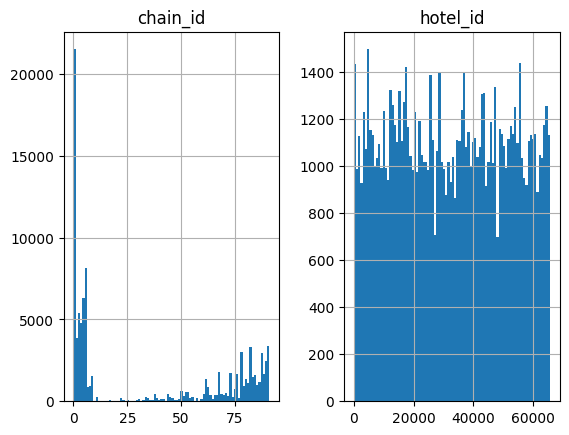

In [1]:
import pandas as pd


df = pd.read_csv("../../data/dataset/train.csv")
df.pop('timestamp')
df = df.rename(columns={'chain': "chain_id", "image": "path"})

df['path'] = df.chain_id.astype(str).str.cat(df.path, sep="/")
df = df.set_index("path")
df.hist(bins=88)
df

In [2]:
# map chain id
chain_id_mapping = pd.Series(df.reset_index().chain_id.sort_values().unique(), name='chain_id').to_frame().reset_index().set_index('chain_id')
display(chain_id_mapping)
df.chain_id = df.chain_id.map(lambda c: chain_id_mapping.loc[c, 'index'])
df

,index
chain_id,
0,0
1,1
2,2
3,3
4,4
...,...
87,83
88,84
89,85


/tmp/ipykernel_85645/3267791073.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.chain = df.chain_id.map(lambda c: chain_id_mapping.loc[c, 'index'])


,chain_id,hotel_id
path,,
85/8000d59f6a3d765f.jpg,85,24607
6/8000febe81817f7f.jpg,6,25389
3/80053befc2d42fba.jpg,3,672
5/8007fa0a8fe89f9d.jpg,5,63866
0/800a4a6b6f6d2df6.jpg,0,12036
...,...,...
83/ffff8082ec219892.jpg,83,20544
82/ffff8200e50cc0f1.jpg,82,51053
83/ffff84129981a4a4.jpg,83,42842


In [3]:
# map hotel id
hotel_id_mapping = pd.Series(df.reset_index().hotel_id.sort_values().unique(), name='hotel_id').to_frame().reset_index().set_index('hotel_id')
display(hotel_id_mapping)
df.hotel_id = df.hotel_id.map(lambda c: hotel_id_mapping.loc[c, 'index'])
df

,index
hotel_id,
12,0
24,1
44,2
45,3
49,4
...,...
65478,7765
65490,7766
65497,7767


,chain_id,hotel_id
path,,
85/8000d59f6a3d765f.jpg,85,2946
6/8000febe81817f7f.jpg,6,3030
3/80053befc2d42fba.jpg,3,91
5/8007fa0a8fe89f9d.jpg,5,7546
0/800a4a6b6f6d2df6.jpg,0,1405
...,...,...
83/ffff8082ec219892.jpg,83,2489
82/ffff8200e50cc0f1.jpg,82,6031
83/ffff84129981a4a4.jpg,83,5052


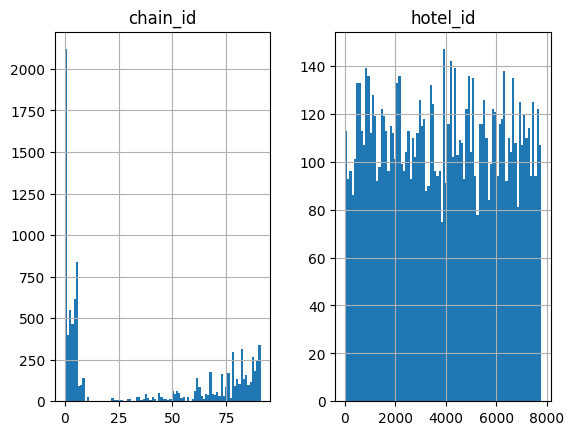

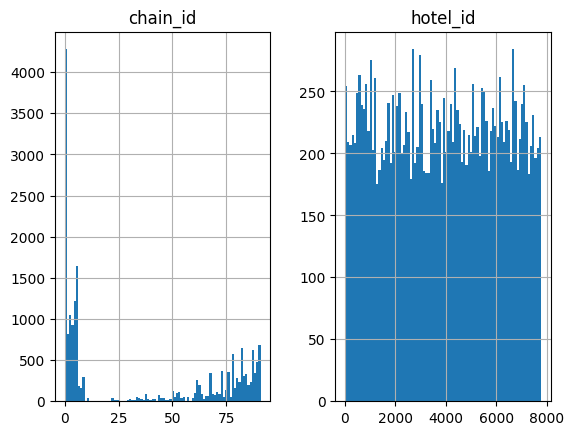

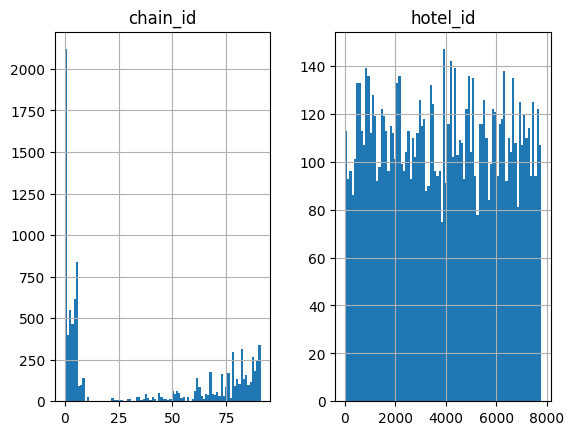

In [4]:
import numpy as np

df_shuffled = df.sample(frac=1)
train, val, test = np.split(df_shuffled, [int(0.7*len(df_shuffled)), int(0.9*len(df_shuffled))])
test.hist(bins=88)
val.hist(bins=88)
test.hist(bins=88)

train.to_csv("../../data/dataset/hotel_train_chain.csv")
val.to_csv("../../data/dataset/hotel_val_chain.csv")
test.to_csv("../../data/dataset/hotel_test_chain.csv")

## Compute ChainID inverse weights

In [13]:
display(df.max())
df_chain_id_weights = 1 / df.chain_id.value_counts()
df_chain_id_weights = df_chain_id_weights / df_chain_id_weights.sum()
df_chain_id_weights.name = 'weights'
df_chain_id_weights.to_csv('../../data/dataset/chain_id_weights.csv')

df_hotel_id_weights = 1 / df.hotel_id.value_counts()
df_hotel_id_weights = df_hotel_id_weights / df_hotel_id_weights.sum()
df_hotel_id_weights.name = 'weights'
df_hotel_id_weights.to_csv('../../data/dataset/hotel_id_weights.csv')

chain_id      91
hotel_id    7769
dtype: int64